# Amazon Alexa Reviews Analysis

### The aim is to analyse Alexa's reviews by NLP. If the feedback is positive, the result is 1, else it is 0. Using logistic regression, I have tried to classify the feedback as positive or negative.

### Importing Libraries

In [1]:
import pandas as pd
import nltk 
nltk.download('stopwords')                 # download the stopwords from NLTK

import re                                  # library for regular expression operations
import string                              # for string operations

from nltk.corpus import stopwords          # module for stop words that come with NLTK
from nltk.stem import PorterStemmer        # module for stemming
from nltk.tokenize import TweetTokenizer   # module for tokenizing strings

from sklearn.linear_model import LogisticRegression  
from sklearn.feature_extraction.text import CountVectorizer  
from sklearn.model_selection import train_test_split  
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt            # library for visualization
import seaborn as sns

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rajra\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Getting our Data

In [2]:
df = pd.read_csv(r'..\Dataset\amazon_alexa.csv')
df

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1
...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1


### Data Preprocessing

In [3]:
df = df.drop(['rating', 'date', 'variation'], axis = 1)
df

,verified_reviews,feedback
0,Love my Echo!,1
1,Loved it!,1
2,"Sometimes while playing a game, you can answer...",1
3,I have had a lot of fun with this thing. My 4 ...,1
4,Music,1
...,...,...
3145,"Perfect for kids, adults and everyone in betwe...",1
3146,"Listening to music, searching locations, check...",1
3147,"I do love these things, i have them running my...",1
3148,Only complaint I have is that the sound qualit...,1


In [4]:
df.isnull().any()  # checking for null values

verified_reviews     True
feedback            False
dtype: bool

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   verified_reviews  3149 non-null   object
 1   feedback          3150 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 49.3+ KB


In [22]:
from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string

def process_rev(rev):
    """Process review function.
    Input:
        rev: a string containing a review
    Output:
        rev_clean: a list of words containing the processed review
    """
    stemmer = PorterStemmer()
    stopwords_english = set(stopwords.words('english'))
    # tokenize reviews
    tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True, reduce_len=True)
    rev_tokens = tokenizer.tokenize(rev)

    rev_clean = []
    for word in rev_tokens:
        if (word not in stopwords_english and  # remove stopwords
                word not in string.punctuation and word not in ["'"] and word.isalpha()):  # remove punctuation
            stem_word = stemmer.stem(word)  # stemming word
            rev_clean.append(stem_word)

    print(rev_clean)
    return rev_clean


In [25]:
# using the process_rev function for:
# 1. Removing stop words
# 2. Tokenization
# 3. Stemming
A = []
df['verified_reviews'] = df['verified_reviews'].astype(str)  # Ensure all entries are strings

a = df['verified_reviews']
for i in a:
  i = process_rev(i)
  A.append(i)
df['verified_reviews'] = A


['love', 'echo']
['love']
['sometim', 'play', 'game', 'answer', 'question', 'correctli', 'alexa', 'say', 'got', 'wrong', 'answer', 'like', 'abl', 'turn', 'light', 'away', 'home']
['lot', 'fun', 'thing', 'yr', 'old', 'learn', 'dinosaur', 'control', 'light', 'play', 'game', 'like', 'categori', 'nice', 'sound', 'play', 'music', 'well']
['music']
['receiv', 'echo', 'gift', 'need', 'anoth', 'bluetooth', 'someth', 'play', 'music', 'easili', 'access', 'found', 'smart', 'speaker', 'wait', 'see', 'el']
['without', 'cellphon', 'cannot', 'use', 'mani', 'featur', 'ipad', 'see', 'use', 'great', 'alarm', 'u', 'r', 'almost', 'deaf', 'hear', 'alarm', 'bedroom', 'live', 'room', 'reason', 'enough', 'keep', 'fun', 'ask', 'random', 'question', 'hear', 'respon', 'seem', 'smartbon', 'polit', 'yet']
['think', 'one', 'purcha', 'work', 'get', 'one', 'everi', 'room', 'hou', 'realli', 'like', 'featur', 'offer', 'specifili', 'play', 'music', 'echo', 'control', 'light', 'throughout', 'hou']
['look', 'great']
['lov

### Vectorizing

In [26]:
cv = CountVectorizer(max_features=1500, analyzer='word', lowercase=False) 

In [27]:
df['verified_reviews'] = df['verified_reviews'].apply(lambda x: " ".join(x) )  # to join all words in the lists
X = cv.fit_transform(df['verified_reviews'])  # predictor variable 'X'

In [51]:
df[df['feedback']==0].head(1)['verified_reviews']

46    like siri fact siri answer accur alexa see rea...
Name: verified_reviews, dtype: object

In [52]:
review_value = df[df['feedback']==0].head(1)['verified_reviews'].iloc[0]
print(review_value)


like siri fact siri answer accur alexa see real need household though good bargain prime day deal


In [29]:
y = pd.DataFrame(df['feedback'])  # respose variable 'y'
y.head()

,feedback
0,1
1,1
2,1
3,1
4,1


### Splitting for Training and Testing

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)  # splitting in the ratio 80:20

In [37]:
X_train

<2520x1500 sparse matrix of type '<class 'numpy.int64'>'
	with 26643 stored elements in Compressed Sparse Row format>

### Model

In [31]:
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

c:\Users\rajra\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(random_state=0)

### Making Predictions

In [32]:
y_pred = classifier.predict(X_test)
y_pred

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

### Checking Accuracy

In [33]:
roc_auc_score(y_test, y_pred)

0.681712962962963

# Predictions are 68.25% accurate.

### Results' Visualization

In [34]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 20,  34],
       [  4, 572]], dtype=int64)

Text(0.5, 1.0, 'Accuracy Score: 0.681712962962963')

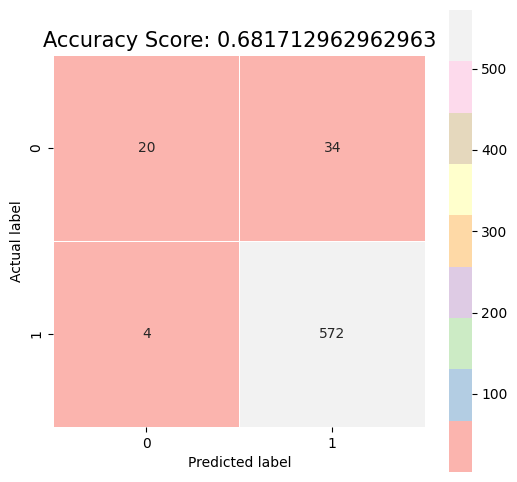

In [35]:
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=0.5, square = True, cmap = 'Pastel1')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(roc_auc_score(y_test, y_pred))
plt.title(all_sample_title, size = 15)

### Getting the pkl file

In [38]:
import pickle
pickle.dump(classifier, open('AmazonAlexaReviewsAnalysis.pkl', 'wb'))
# Getting the pkl file for the CountVectorizer
pickle.dump(cv, open('CountVectorizer.pkl', 'wb'))
